## Code for plot Early Warning Signals (EWS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import ewstools.core as ewstools
import datetime
from pylab import cm

In [2]:
# Weekly data on measles cases during three selected outbreaks
ca_cases = pd.read_csv('ca14_cases.csv')
ny_cases = pd.read_csv('ny18_cases.csv')
bc_cases = pd.read_csv('bc14_cases.csv')

ca_cases['Time'] = pd.to_datetime(ca_cases['Time'])
ny_cases['Time'] = pd.to_datetime(ny_cases['Time'])
bc_cases['Time'] = pd.to_datetime(bc_cases['Time'])

In [3]:
# Daily data on the number of pro-vaccine Tweets before and during three selected outbreaks
ca_count = pd.read_csv('ca14_count.csv')
ny_count = pd.read_csv('ny18_count.csv')
bc_count = pd.read_csv('bc14_count.csv')

ca_count['Time'] = pd.to_datetime(ca_count['Time'])
ny_count['Time'] = pd.to_datetime(ny_count['Time'])
bc_count['Time'] = pd.to_datetime(bc_count['Time'])

In [4]:
# One realization of the SDE mode
# 'sde_cases' refers to I
# 'sde_count' refers to Tw
# (see sde_simulation.ipynb)
sde_cases = pd.read_csv('sde_cases.csv')
sde_count = pd.read_csv('sde_count.csv')

### Obtain EWS indicators

In [5]:
rw = 0.2 # rolling window
span = 0.2 # Lowess span
band_width = 0.1 # Gaussian bandwidth
lags = [1] # autocorrelation lag times to compute
ews = ['var','sd','cv','skew','kurt','ac','smax','cf','aic'] # EWS to compute
ham_length = 80 # number of data points in Hamming window
ham_offset = 0.5 # proportion of Hamming window to offset by upon each iteration
pspec_roll_offset = 20 # offset for rolling window when doing spectrum metrics

In [6]:
# CA 2014
pre_outbreak_ca = ca_count[ca_count['Time'] < '2014-12-27']

ews_dic = ewstools.ews_compute(pre_outbreak_ca['Count'], 
                               roll_window = rw,
                               smooth='Gaussian',
                               band_width = band_width,
                               lag_times = lags, 
                               ews = ews,
                               upto='Full')

df_ews = ews_dic['EWS metrics']
df_ktau = ews_dic['Kendall tau']

df_ca = df_ews[['State variable', 'Smoothing', 'Residuals', 'Variance', 'Lag-1 AC', 'Coefficient of variation']]
df_ca['Time'] = pre_outbreak_ca['Time']
df_ca['Normalized'] = df_ca['Residuals'] / np.mean(np.abs(df_ca['Residuals']))

<ipython-input-6-af574ab921b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['Time'] = pre_outbreak_ca['Time']
<ipython-input-6-af574ab921b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['Normalized'] = df_ca['Residuals'] / np.mean(np.abs(df_ca['Residuals']))


In [7]:
# NY 2018
pre_outbreak_ny = ny_count[ny_count['Time'] < '2018-09-30']

ews_dic = ewstools.ews_compute(pre_outbreak_ny['Count'], 
                               roll_window = rw,
                               smooth='Gaussian',
                               band_width = band_width,
                               lag_times = lags, 
                               ews = ews,
                               upto='Full')

df_ews = ews_dic['EWS metrics']
df_ktau = ews_dic['Kendall tau']

df_ny = df_ews[['State variable', 'Smoothing', 'Residuals', 'Variance', 'Lag-1 AC', 'Coefficient of variation']]
df_ny['Time'] = pre_outbreak_ny['Time']
df_ny['Normalized'] = df_ny['Residuals'] / np.mean(np.abs(df_ny['Residuals']))

<ipython-input-7-25ad66aa8492>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['Time'] = pre_outbreak_ny['Time']
<ipython-input-7-25ad66aa8492>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['Normalized'] = df_ny['Residuals'] / np.mean(np.abs(df_ny['Residuals']))


In [8]:
# BC 2014
pre_outbreak_bc = bc_count[bc_count['Time'] < '2014-02-22']

ews_dic = ewstools.ews_compute(pre_outbreak_bc['Count'], 
                               roll_window = rw,
                               smooth='Gaussian',
                               band_width = band_width,
                               lag_times = lags, 
                               ews = ews,
                               upto='Full')

df_ews = ews_dic['EWS metrics']
df_ktau = ews_dic['Kendall tau']

df_bc = df_ews[['State variable', 'Smoothing', 'Residuals', 'Variance', 'Lag-1 AC', 'Coefficient of variation']]
df_bc['Time'] = pre_outbreak_bc['Time']
df_bc['Normalized'] = df_bc['Residuals'] / np.mean(np.abs(df_bc['Residuals']))

<ipython-input-8-6bb5e86797df>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bc['Time'] = pre_outbreak_bc['Time']
<ipython-input-8-6bb5e86797df>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bc['Normalized'] = df_bc['Residuals'] / np.mean(np.abs(df_bc['Residuals']))


In [9]:
# SDE
pre_outbreak_sde = sde_count[:14404]  # timepoint 14404 is obtained by checking sde_cases > 1e-4

ews_dic = ewstools.ews_compute(pre_outbreak_sde['Count'], 
                               roll_window = rw,
                               smooth='Gaussian',
                               band_width = band_width,
                               lag_times = lags, 
                               ews = ews,
                               upto='Full')

df_ews = ews_dic['EWS metrics']
df_ktau = ews_dic['Kendall tau']

df_sde = df_ews[['State variable', 'Smoothing', 'Residuals', 'Variance', 'Lag-1 AC', 'Coefficient of variation']]
df_sde['Time'] = pre_outbreak_sde['Time']
df_sde['Normalized'] = df_sde['Residuals'] / np.mean(np.abs(df_sde['Residuals']))

<ipython-input-9-5235c16d97cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sde['Time'] = pre_outbreak_sde['Time']
<ipython-input-9-5235c16d97cb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sde['Normalized'] = df_sde['Residuals'] / np.mean(np.abs(df_sde['Residuals']))


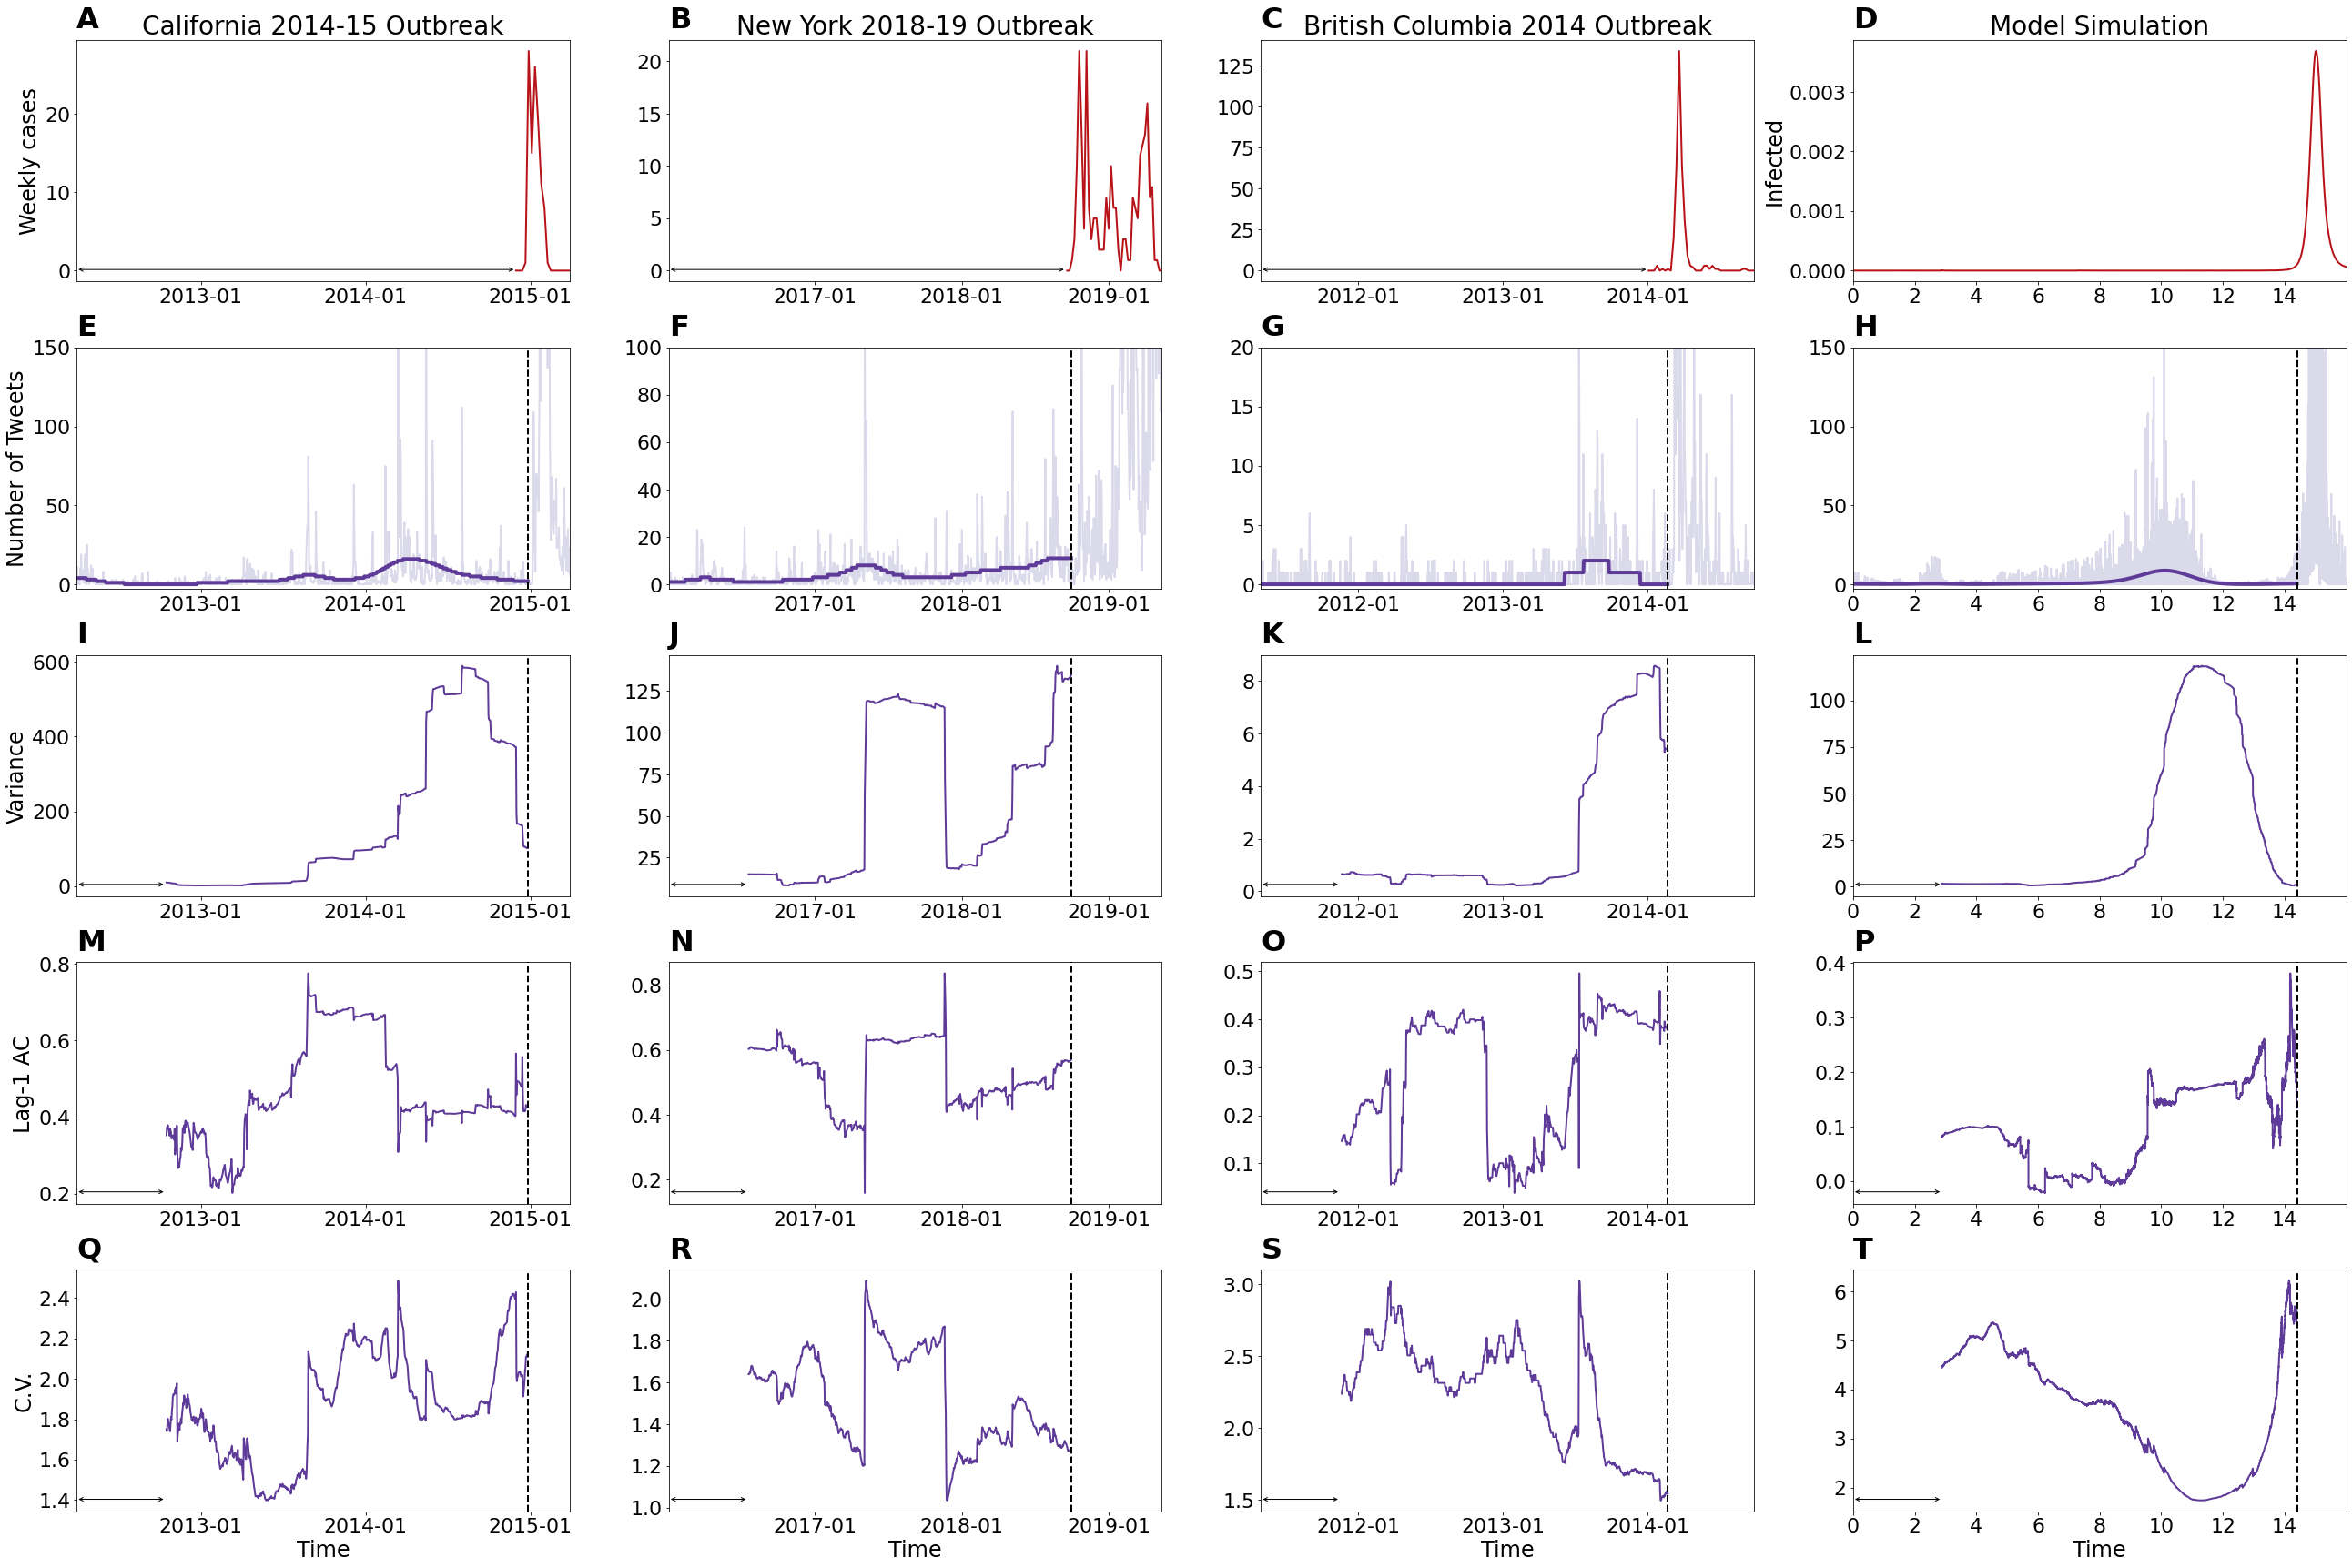

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(36,24))
plt.subplots_adjust(hspace=0.3)

# Cases
ax[0,0].set_title('California 2014-15 Outbreak', fontsize=28)
ax[0,0].plot(ca_cases['Time'], ca_cases['Cases'], linewidth=2, color=plt.cm.Reds(208))
ax[0,0].set_xlim(left=df_ca['Time'][0], right=np.array(ca_cases['Time'])[-1])
ax[0,0].annotate('', xy=(0, 0.05), xytext=(0.89, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[0,1].set_title('New York 2018-19 Outbreak', fontsize=28)
ax[0,1].plot(ny_cases['Time'], ny_cases['Cases'], linewidth=2, color=plt.cm.Reds(208))
ax[0,1].set_xlim(left=df_ny['Time'][0], right=np.array(ny_cases['Time'])[-1])
ax[0,1].annotate('', xy=(0, 0.05), xytext=(0.805, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[0,2].set_title('British Columbia 2014 Outbreak', fontsize=28)
ax[0,2].plot(bc_cases['Time'], bc_cases['Cases'], linewidth=2, color=plt.cm.Reds(208))
ax[0,2].set_xlim(left=df_bc['Time'][0], right=np.array(bc_cases['Time'])[-1])
ax[0,2].annotate('', xy=(0, 0.05), xytext=(0.785, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[0,3].set_title('Model Simulation', fontsize=28)
ax[0,3].plot(sde_cases['Time'][:16000], sde_cases['Cases'][:16000], linewidth=2, color=plt.cm.Reds(208))
ax[0,3].set_xlim(left=sde_cases['Time'][0], right=sde_cases['Time'][15999])
ax[0,0].set_ylabel('Weekly cases', fontsize=24)
ax[0,3].set_ylabel('Infected', fontsize=24)
ax[0,0].xaxis.set_major_locator(mdates.YearLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0,1].xaxis.set_major_locator(mdates.YearLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0,2].xaxis.set_major_locator(mdates.YearLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[0,0].text(0, 1.05, 'A', transform=ax[0,0].transAxes, size=32, weight='bold')
ax[0,1].text(0, 1.05, 'B', transform=ax[0,1].transAxes, size=32, weight='bold')
ax[0,2].text(0, 1.05, 'C', transform=ax[0,2].transAxes, size=32, weight='bold')
ax[0,3].text(0, 1.05, 'D', transform=ax[0,3].transAxes, size=32, weight='bold')

# CA
ax[1,0].plot(ca_count['Time'], ca_count['Count'], linewidth=2, color=plt.cm.Purples(64))
ax[1,0].plot(df_ca['Time'], df_ca['Smoothing'], linewidth=4, color=plt.cm.Purples(208))
ax[1,0].set_xlim(left=df_ca['Time'][0], right=np.array(ca_cases['Time'])[-1])
ax[1,0].set_ylim(bottom=-3, top=150)
ax[1,0].axvline(x=np.array(df_ca['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[1,0].xaxis.set_major_locator(mdates.YearLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1,0].set_ylabel('Number of Tweets', fontsize=24)

ax[2,0].plot(df_ca['Time'], df_ca['Variance'], linewidth=2, color=plt.cm.Purples(208))
ax[2,0].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[2,0].set_xlim(left=df_ca['Time'][0], right=np.array(ca_cases['Time'])[-1])
ax[2,0].axvline(x=np.array(df_ca['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[2,0].xaxis.set_major_locator(mdates.YearLocator())
ax[2,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[2,0].set_ylabel('Variance', fontsize=24)

ax[3,0].plot(df_ca['Time'], df_ca['Lag-1 AC'], linewidth=2, color=plt.cm.Purples(208))
ax[3,0].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[3,0].set_xlim(left=df_ca['Time'][0], right=np.array(ca_cases['Time'])[-1])
ax[3,0].axvline(x=np.array(df_ca['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[3,0].xaxis.set_major_locator(mdates.YearLocator())
ax[3,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[3,0].set_ylabel('Lag-1 AC', fontsize=24)

ax[4,0].plot(df_ca['Time'], df_ca['Coefficient of variation'], linewidth=2, color=plt.cm.Purples(208))
ax[4,0].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[4,0].set_xlim(left=df_ca['Time'][0], right=np.array(ca_cases['Time'])[-1])
ax[4,0].axvline(x=np.array(df_ca['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[4,0].xaxis.set_major_locator(mdates.YearLocator())
ax[4,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[4,0].set_xlabel('Time', fontsize=24)
ax[4,0].set_ylabel('C.V.', fontsize=24)

# NY
ax[1,1].plot(ny_count['Time'], ny_count['Count'], linewidth=2, color=plt.cm.Purples(64))
ax[1,1].plot(df_ny['Time'], df_ny['Smoothing'], linewidth=4, color=plt.cm.Purples(208))
ax[1,1].set_xlim(left=df_ny['Time'][0], right=np.array(ny_cases['Time'])[-1])
ax[1,1].set_ylim(bottom=-2, top=100)
ax[1,1].axvline(x=np.array(df_ny['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[1,1].xaxis.set_major_locator(mdates.YearLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[2,1].plot(df_ny['Time'], df_ny['Variance'], linewidth=2, color=plt.cm.Purples(208))
ax[2,1].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[2,1].set_xlim(left=df_ny['Time'][0], right=np.array(ny_cases['Time'])[-1])
ax[2,1].axvline(x=np.array(df_ny['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[2,1].xaxis.set_major_locator(mdates.YearLocator())
ax[2,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[3,1].plot(df_ny['Time'], df_ny['Lag-1 AC'], linewidth=2, color=plt.cm.Purples(208))
ax[3,1].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[3,1].set_xlim(left=df_ny['Time'][0], right=np.array(ny_cases['Time'])[-1])
ax[3,1].axvline(x=np.array(df_ny['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[3,1].xaxis.set_major_locator(mdates.YearLocator())
ax[3,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[4,1].plot(df_ny['Time'], df_ny['Coefficient of variation'], linewidth=2, color=plt.cm.Purples(208))
ax[4,1].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[4,1].set_xlim(left=df_ny['Time'][0], right=np.array(ny_cases['Time'])[-1])
ax[4,1].axvline(x=np.array(df_ny['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[4,1].xaxis.set_major_locator(mdates.YearLocator())
ax[4,1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[4,1].set_xlabel('Time', fontsize=24)

# BC
ax[1,2].plot(bc_count['Time'], bc_count['Count'], linewidth=2, color=plt.cm.Purples(64))
ax[1,2].plot(df_bc['Time'], df_bc['Smoothing'], linewidth=4, color=plt.cm.Purples(208))
ax[1,2].set_xlim(left=df_bc['Time'][0], right=np.array(bc_cases['Time'])[-1])
ax[1,2].set_ylim(bottom=-0.4, top=20)
ax[1,2].axvline(x=np.array(df_bc['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[1,2].xaxis.set_major_locator(mdates.YearLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[2,2].plot(df_bc['Time'], df_bc['Variance'], linewidth=2, color=plt.cm.Purples(208))
ax[2,2].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[2,2].set_xlim(left=df_bc['Time'][0], right=np.array(bc_cases['Time'])[-1])
ax[2,2].axvline(x=np.array(df_bc['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[2,2].xaxis.set_major_locator(mdates.YearLocator())
ax[2,2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[3,2].plot(df_bc['Time'], df_bc['Lag-1 AC'], linewidth=2, color=plt.cm.Purples(208))
ax[3,2].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[3,2].set_xlim(left=df_bc['Time'][0], right=np.array(bc_cases['Time'])[-1])
ax[3,2].axvline(x=np.array(df_bc['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[3,2].xaxis.set_major_locator(mdates.YearLocator())
ax[3,2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax[4,2].plot(df_bc['Time'], df_bc['Coefficient of variation'], linewidth=2, color=plt.cm.Purples(208))
ax[4,2].annotate('', xy=(0, 0.05), xytext=(0.16, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[4,2].set_xlim(left=df_bc['Time'][0], right=np.array(bc_cases['Time'])[-1])
ax[4,2].xaxis.set_major_locator(mdates.YearLocator())
ax[4,2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[4,2].axvline(x=np.array(df_bc['Time'])[-1], linestyle='--', color='k', linewidth=2)
ax[4,2].set_xlabel('Time', fontsize=24)

# Model
ax[1,3].plot(sde_count['Time'][:16000], sde_count['Count'][:16000], linewidth=2, color=plt.cm.Purples(64))
ax[1,3].plot(df_sde['Time'], df_sde['Smoothing'], linewidth=4, color=plt.cm.Purples(208))
ax[1,3].set_xlim(left=df_sde['Time'][0], right=sde_cases['Time'][15999])
ax[1,3].set_ylim(bottom=-3, top=150)
ax[1,3].axvline(x=np.array(sde_count['Time'])[14404], linestyle='--', color='k', linewidth=2)

ax[2,3].plot(df_sde['Time'], df_sde['Variance'], linewidth=2, color=plt.cm.Purples(208))
ax[2,3].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[2,3].set_xlim(left=df_sde['Time'][0], right=sde_cases['Time'][15999])
ax[2,3].axvline(x=np.array(sde_count['Time'])[14404], linestyle='--', color='k', linewidth=2)

ax[3,3].plot(df_sde['Time'], df_sde['Lag-1 AC'], linewidth=2, color=plt.cm.Purples(208))
ax[3,3].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[3,3].set_xlim(left=df_sde['Time'][0], right=sde_cases['Time'][15999])
ax[3,3].axvline(x=np.array(sde_count['Time'])[14404], linestyle='--', color='k', linewidth=2)

ax[4,3].plot(df_sde['Time'], df_sde['Coefficient of variation'], linewidth=2, color=plt.cm.Purples(208))
ax[4,3].annotate('', xy=(0, 0.05), xytext=(0.18, 0.05), arrowprops=dict(arrowstyle="<->"), xycoords='axes fraction')
ax[4,3].set_xlim(left=df_sde['Time'][0], right=sde_cases['Time'][15999])
ax[4,3].axvline(x=np.array(sde_count['Time'])[14404], linestyle='--', color='k', linewidth=2)
ax[4,3].set_xlabel('Time', fontsize=24)

ax[1,0].text(0, 1.05, 'E', transform=ax[1,0].transAxes, size=32, weight='bold')
ax[1,1].text(0, 1.05, 'F', transform=ax[1,1].transAxes, size=32, weight='bold')
ax[1,2].text(0, 1.05, 'G', transform=ax[1,2].transAxes, size=32, weight='bold')
ax[1,3].text(0, 1.05, 'H', transform=ax[1,3].transAxes, size=32, weight='bold')
ax[2,0].text(0, 1.05, 'I', transform=ax[2,0].transAxes, size=32, weight='bold')
ax[2,1].text(0, 1.05, 'J', transform=ax[2,1].transAxes, size=32, weight='bold')
ax[2,2].text(0, 1.05, 'K', transform=ax[2,2].transAxes, size=32, weight='bold')
ax[2,3].text(0, 1.05, 'L', transform=ax[2,3].transAxes, size=32, weight='bold')
ax[3,0].text(0, 1.05, 'M', transform=ax[3,0].transAxes, size=32, weight='bold')
ax[3,1].text(0, 1.05, 'N', transform=ax[3,1].transAxes, size=32, weight='bold')
ax[3,2].text(0, 1.05, 'O', transform=ax[3,2].transAxes, size=32, weight='bold')
ax[3,3].text(0, 1.05, 'P', transform=ax[3,3].transAxes, size=32, weight='bold')
ax[4,0].text(0, 1.05, 'Q', transform=ax[4,0].transAxes, size=32, weight='bold')
ax[4,1].text(0, 1.05, 'R', transform=ax[4,1].transAxes, size=32, weight='bold')
ax[4,2].text(0, 1.05, 'S', transform=ax[4,2].transAxes, size=32, weight='bold')
ax[4,3].text(0, 1.05, 'T', transform=ax[4,3].transAxes, size=32, weight='bold')

for ax in ax.flat:
    ax.tick_params(axis='both', which='major', labelsize=22)

fig.tight_layout()